In [19]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [26]:
X= mnist["data"] 
y= mnist["target"]


In [27]:
X.shape

(70000, 784)

In [28]:
y.shape

(70000,)

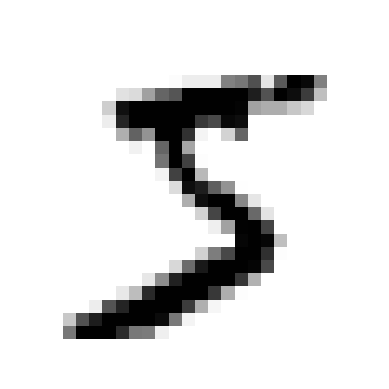

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [24]:
y[0]

'5'

In [34]:
import numpy as np
y = y.astype(np.uint8)

In [35]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [36]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [37]:
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]


    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [43]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [44]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [45]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [47]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [48]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [49]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [51]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [52]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [53]:
y_some_digit_pred

array([ True])

In [54]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False])

In [56]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method = "decision_function")

In [57]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

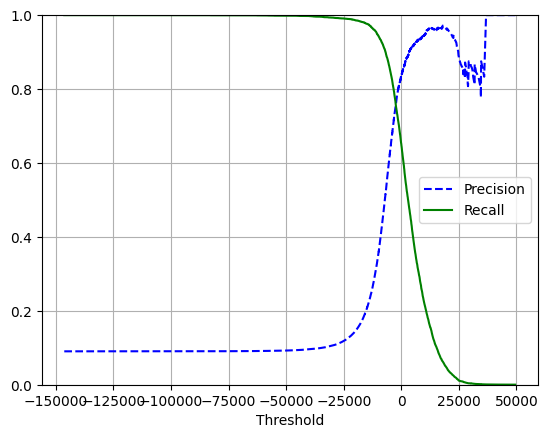

In [58]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    plt.grid(True)
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

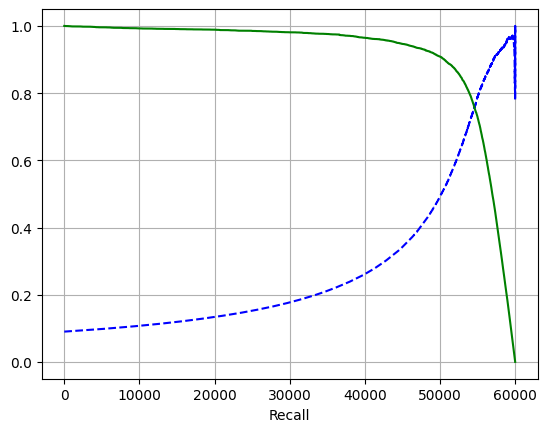

In [66]:
def plot_precission_vs_recall(precisions,recalls):
    plt.plot(precisions[:-1],"b--",label="precision")
    plt.plot(recalls[:-1],"g-",label="Recall")
    plt.grid(True)
    plt.xlabel("Recall")
plot_precission_vs_recall(precisions,recalls)
plt.show

In [60]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [61]:
threshold_90_precision

3370.019499144183

In [62]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [63]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [67]:
# true positive rate vs false positive rate
# TNR -> Specificity
#recall vs 1- specificity

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

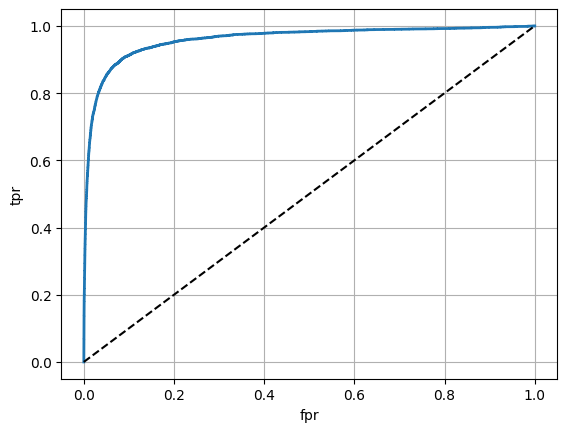

In [69]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr,tpr)
plt.show()


In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [72]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)


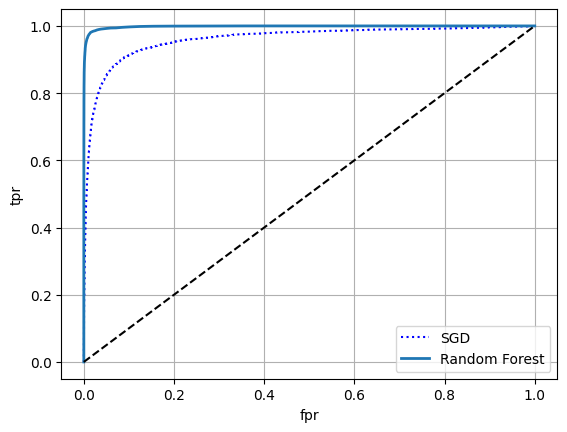

In [73]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [74]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983296721818179